In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Generate synthetic dataset for electricity consumption
np.random.seed(0)
dates = pd.date_range(start='2018-01-01', end='2021-12-01', freq='M')
consumption = np.random.randint(1000, 5000, size=len(dates))

# Create DataFrame
electricity_data = pd.DataFrame({'Date': dates, 'Electricity Consumption': consumption})
electricity_data = electricity_data.set_index('Date')

# Display the first few rows of the dataset
print(electricity_data.head())

            Electricity Consumption
Date                               
2018-01-31                     3732
2018-02-28                     3607
2018-03-31                     2653
2018-04-30                     4264
2018-05-31                     1835


c:\Users\uppada satwik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


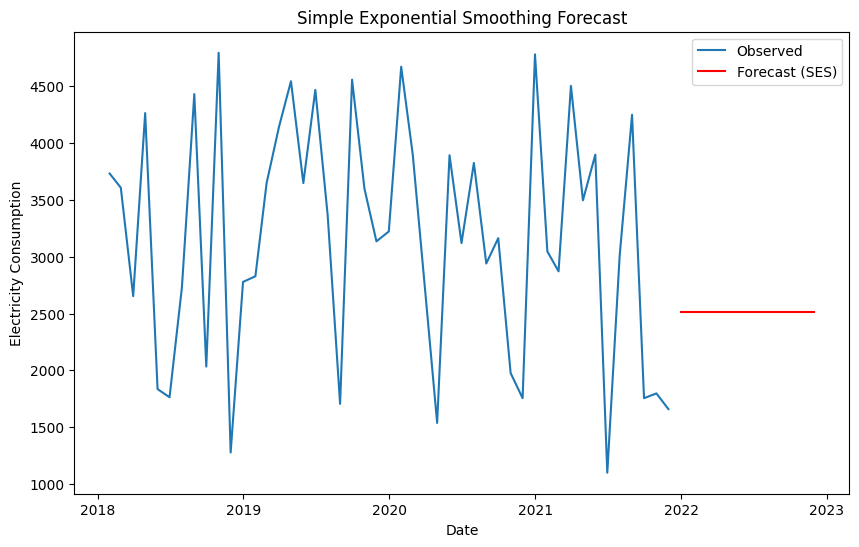

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
simple_exp_model = SimpleExpSmoothing(electricity_data['Electricity Consumption']).fit(smoothing_level=0.2, optimized=False)

# Forecast future electricity consumption
forecast_simple_exp = simple_exp_model.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(electricity_data.index, electricity_data['Electricity Consumption'], label='Observed')
plt.plot(forecast_simple_exp.index, forecast_simple_exp, label='Forecast (SES)', color='red')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()


c:\Users\uppada satwik\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


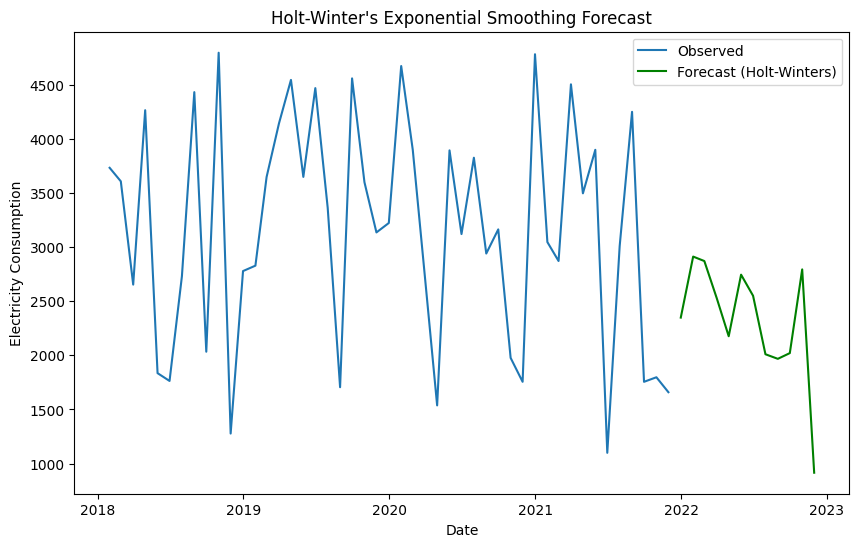

In [16]:
# Fit Holt-Winter's Exponential Smoothing model
holt_winters_model = ExponentialSmoothing(electricity_data['Electricity Consumption'], 
                                          trend='add', 
                                          seasonal='add', 
                                          seasonal_periods=12).fit()

# Forecast future electricity consumption
forecast_holt_winters = holt_winters_model.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(electricity_data.index, electricity_data['Electricity Consumption'], label='Observed')
plt.plot(forecast_holt_winters.index, forecast_holt_winters, label='Forecast (Holt-Winters)', color='green')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Holt-Winter\'s Exponential Smoothing Forecast')
plt.legend()
plt.show()


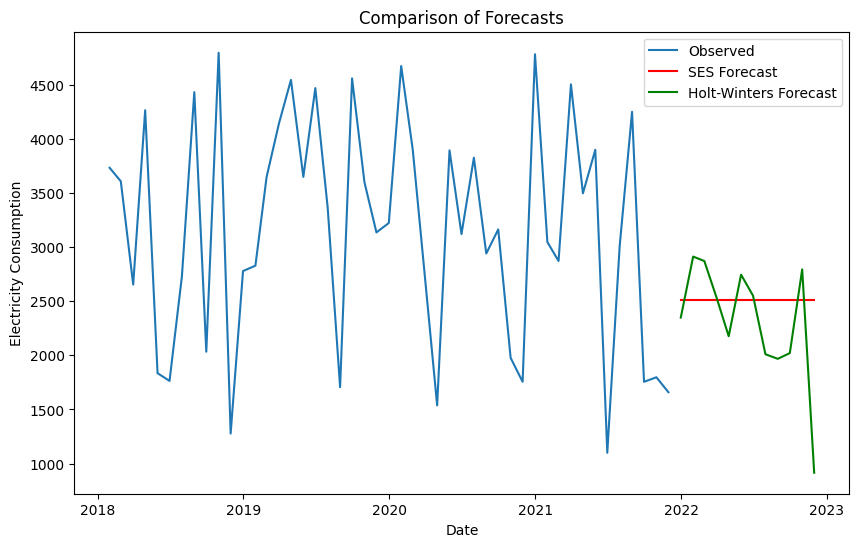

Mean Absolute Error (SES): 1250.4077549032654
Mean Absolute Error (Holt-Winters): 1116.5517835083829


In [17]:
# Combine observed data and forecasts for comparison
combined_forecast = pd.DataFrame({
    'Observed': electricity_data['Electricity Consumption'],
    'SES Forecast': forecast_simple_exp,
    'Holt-Winters Forecast': forecast_holt_winters
})

# Plot the original data and both forecasts
plt.figure(figsize=(10, 6))
plt.plot(electricity_data.index, electricity_data['Electricity Consumption'], label='Observed')
plt.plot(forecast_simple_exp.index, forecast_simple_exp, label='SES Forecast', color='red')
plt.plot(forecast_holt_winters.index, forecast_holt_winters, label='Holt-Winters Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.title('Comparison of Forecasts')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE) for both models
from sklearn.metrics import mean_absolute_error

# Assuming we have the true values for the forecast period (synthetic here)
true_values = np.random.randint(1000, 5000, size=12)

mae_ses = mean_absolute_error(true_values, forecast_simple_exp)
mae_hw = mean_absolute_error(true_values, forecast_holt_winters)

print(f'Mean Absolute Error (SES): {mae_ses}')
print(f'Mean Absolute Error (Holt-Winters): {mae_hw}')
